In [219]:
"""
Evan Hodge 800986621 HW_1 ECGR_4105

P 1 A

Develop a gradient decent training and evaluation code that predicts 
housing price based on the following input variables(index):

area(1), bedrooms(2), bathrooms(3), stories(4), parking(10), H=price(0)

Identify the best parameters for your linear regression model, based 
on the above input variables. 

Plot the training and validation losses (in a single graph, but two 
different lines). For the learning rate, explore different values 
between 0.1 and 0.01 (your choice). Initialize your parameters 
(thetas to zero). For the training iteration, choose what you believe 
fits the best. 

"""
import numpy as np     
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
HS = pd.read_csv('Housing.csv')
HS.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [220]:
from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
np.random.seed(0)
df_train, df_test = train_test_split(HS, train_size = 0.8, test_size = 0.2)
#print(df_train.shape)
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [221]:
Y = df_Newtrain.values[:,5]                         # get known price outputs
m = len(Y)
X = df_Newtrain.values[:,0:5]
X = X.reshape(m,5)
X_0 = np.ones((m,1))
X = np.hstack((X_0,X))

Y_test = df_Newtest.values[:,5]                     # get Test price outputs
m_test = len(Y_test)
X_test = df_Newtest.values[:,0:5]
X_test = X_test.reshape(m_test,5)
X_0_test = np.ones((m_test,1))
X_test = np.hstack((X_0_test,X_test))

theta = np.zeros(6)   

In [222]:
alpha = 0.000000001                                # Learning Rate and Iterations
iterations = 200

In [223]:
def loss(y,X,m, theta):                             # Loss/Cost Function
    
    H = X.dot(theta)
    error = np.subtract(H,y)
    error_sqrd = np.square(error)
    sum_errors = np.sum(error_sqrd)
    J = np.divide(sum_errors,(2*m))
    
    return J

In [224]:
def grad_decent(theta, alpha, x, y,  iterations):   # Gradient Decent Function
    
    loss_hist = np.zeros(iterations)
    loss_hist_test = np.zeros(iterations)
    
    for i in range(iterations):
        
        H = X.dot(theta)
        err = np.subtract(H,y)
        delta = x.transpose().dot(err)
        gradient = delta / m
        theta = theta - (alpha*gradient)
        loss_hist[i] = loss(y,X, m, theta)
        loss_hist_test[i] = loss(Y_test,X_test, m_test, theta)
    
    return theta, loss_hist, loss_hist_test

In [225]:
theta, loss_hist, loss_hist_test = grad_decent(theta, alpha, X, Y, iterations)
print('Theta =', theta)
#print('Loss =', loss_hist)
#print('Loss =', loss_hist_test)

Theta = [2.10730803e-01 8.59486954e+02 6.95685639e-01 3.37395226e-01
 4.94919019e-01 1.85618544e-01]


Training Loss is 1704650609742.377
    Test Loss is 1549411708699.8862


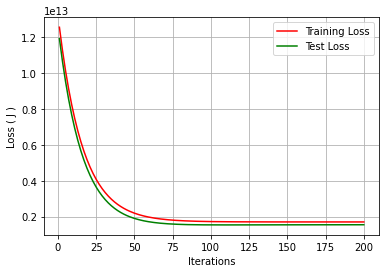

In [255]:
plt.figure(1)                                      # Plotting the loss
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss ( J )')
plt.plot(range(1,iterations+1), loss_hist, color='red')
plt.plot(range(1,iterations+1), loss_hist_test, color='green')
plt.legend(['Training Loss','Test Loss'])
print('Training Loss is' , loss_hist[-1])
print('    Test Loss is' , loss_hist_test[-1])

In [265]:
"""
P 1 B

Develop a gradient decent training and evaluation code that 
predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, 
hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, 
based on the above input variables. 

Plot the training and validation losses (in a single graph, 
but two different lines) over your training iteration. Compare 
your linear regression model against problem 1 a. For the learning 
rate, explore different values between 0.1 and 0.01 (your choice). 
Initialize your parameters (thetas to zero). For the training 
iteration, choose what you believe fits the best.  

"""
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

In [266]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price'] # define binary attributes
bin_vars = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

HS_bin = HS[bin_vars]                                                  # Quantize yes and no
HS_bin = HS[bin_vars].apply(binary_map)

allvars = (bin_vars + num_vars)
#HS_bin.head()

In [267]:
HS_1b = pd.concat((HS_bin,HS[num_vars]), axis=1)
HS_1b.head()


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area,bedrooms,bathrooms,stories,parking,price
0,1,0,0,0,1,1,7420,4,2,3,2,13300000
1,1,0,0,0,1,0,8960,4,4,4,3,12250000
2,1,0,1,0,0,1,9960,3,2,2,2,12250000
3,1,0,1,0,1,1,7500,4,2,2,3,12215000
4,1,1,1,0,1,0,7420,4,1,2,2,11410000


In [268]:
from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
np.random.seed(0)
df_train, df_test = train_test_split(HS_1b, train_size = 0.8, test_size = 0.2)
#print(df_train.shape)

In [269]:
df_Newtrain = df_train[allvars]
df_Newtest = df_test[allvars]
#df_Newtrain.head()

In [270]:
Y = df_Newtrain.values[:,11]                         # get known price outputs
m = len(Y)
X = df_Newtrain.values[:,0:11]
X = X.reshape(m,11)
X_0 = np.ones((m,1))
X = np.hstack((X_0,X))

Y_test = df_Newtest.values[:,11]                     # get Test price outputs
m_test = len(Y_test)
X_test = df_Newtest.values[:,0:11]
X_test = X_test.reshape(m_test,11)
X_0_test = np.ones((m_test,1))
X_test = np.hstack((X_0_test,X_test))

theta = np.zeros(12)   

In [271]:
alpha = 0.00000001                                # Learning Rate and Iterations
iterations = 50

In [272]:
theta, loss_hist, loss_hist_test = grad_decent(theta, alpha, X, Y, iterations)
print('Theta =', theta)                             # Perform ML
#print('Loss =', loss_hist)
#print('Loss =', loss_hist_test)

Theta = [3.13561061e-01 2.83899757e-01 1.08652128e-01 1.79348394e-01
 4.03019720e-02 2.05945144e-01 1.23327308e-01 8.61036628e+02
 1.09683128e+00 5.63000583e-01 8.43335429e-01 2.85563406e-01]


Training Loss is 1704611968243.89
    Test Loss is 1550661743484.9985


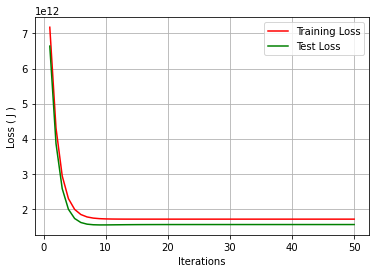

In [273]:
plt.figure(1)                                      # Plotting the loss
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss ( J )')
plt.plot(range(1,iterations+1), loss_hist, color='red')
plt.plot(range(1,iterations+1), loss_hist_test, color='green')
plt.legend(['Training Loss','Test Loss'])
print('Training Loss is' , loss_hist[-1])
print('    Test Loss is' , loss_hist_test[-1])

In [346]:
"""
P 2 A

Repeat problem 1 a, this time with input normalization and input 
standardization as part of your pre-processing logic. You need to 
perform two separate trainings for standardization and 
normalization. 

Plot the training and validation losses for both training and 
validation set based on input standardization and input 
normalization. Compare your training accuracy between both scaling 
approaches as well as the baseline training in problem 1 a. Which 
input scaling achieves the best training? Explain your results.

"""

HS = pd.read_csv('Housing.csv')
HS.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [347]:
from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
np.random.seed(0)
df_train, df_test = train_test_split(HS, train_size = 0.8, test_size = 0.2)
#print(df_train.shape)
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000
...,...,...,...,...,...,...
70,4000,3,2,2,0,6790000
277,10360,2,1,1,1,4305000
9,5750,3,2,4,1,9800000
359,3600,3,1,1,1,3710000


In [348]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
#scaler = StandardScaler()       # 0.194486 test loss
scaler = MinMaxScaler()        # 0.005328 lowest test loss
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain)
df_Newtrain.head(5)
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest)
df_Newtest.head(5)

C:\Users\Evan\AppData\Local\Temp\ipykernel_25480\3818146572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain)
C:\Users\Evan\AppData\Local\Temp\ipykernel_25480\3818146572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtest[num_vars] = scaler.fit_transform(df_Newtest)


,area,bedrooms,bathrooms,stories,parking,price
239,0.203463,0.50,0.0,0.333333,0.333333,0.270000
113,0.690043,0.50,0.0,0.000000,0.666667,0.412667
325,0.156710,0.75,0.0,0.333333,0.000000,0.215000
66,1.000000,0.25,0.0,0.000000,0.333333,0.493333
479,0.174026,0.75,0.0,0.333333,0.000000,0.113333


In [349]:
Y = df_Newtrain.values[:,5]                         # get known price outputs
m = len(Y)
X = df_Newtrain.values[:,0:5]
X = X.reshape(m,5)
X_0 = np.ones((m,1))
X = np.hstack((X_0,X))

Y_test = df_Newtest.values[:,5]                     # get Test price outputs
m_test = len(Y_test)
X_test = df_Newtest.values[:,0:5]
X_test = X_test.reshape(m_test,5)
X_0_test = np.ones((m_test,1))
X_test = np.hstack((X_0_test,X_test))

theta = np.zeros(6)   

In [350]:
alpha = 0.01                                # Learning Rate and Iterations
iterations = 5000

In [351]:
theta, loss_hist, loss_hist_test = grad_decent(theta, alpha, X, Y, iterations)
print('Theta =', theta)
print('     Loss =', loss_hist)
print('Test_Loss =', loss_hist_test)

Theta = [0.06201977 0.28374771 0.10037865 0.20680751 0.14105219 0.11979515]
     Loss = [0.04697501 0.04596297 0.04497855 ... 0.00630829 0.00630821 0.00630813]
Test_Loss = [0.05200566 0.05088612 0.04979644 ... 0.00517986 0.00517983 0.00517979]


Training Loss is 0.00630813289487956 minmaxscaler
    Test Loss is 0.005179790375654593


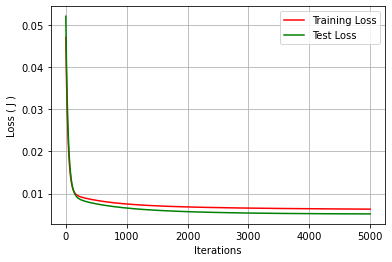

In [353]:
plt.figure(1)                                      # Plotting the loss
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss ( J )')
plt.plot(range(1,iterations+1), loss_hist, color='red')
plt.plot(range(1,iterations+1), loss_hist_test, color='green')
plt.legend(['Training Loss','Test Loss'])
print('Training Loss is' , loss_hist[-1],'minmaxscaler')
print('    Test Loss is' , loss_hist_test[-1])

In [374]:
"""
P 2 B

Repeat problem 1 b, this time with input normalization and input 
standardization as part of your pre-processing logic. You need to 
perform two separate trainings for standardization and 
normalization. 

Plot the training and validation losses for both training and 
validation set based on input standardization and input 
normalization. Compare your training accuracy between both scaling 
approaches as well as the baseline training in problem 1 b. Which 
input scaling achieves the best training? Explain your results. 

"""
HS = pd.read_csv('Housing.csv')
HS.head()
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

In [375]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price'] # define binary attributes
bin_vars = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

HS_bin = HS[bin_vars]                                                  # Quantize yes and no
HS_bin = HS[bin_vars].apply(binary_map)

allvars = (bin_vars + num_vars)
#HS_bin.head()

In [376]:
HS_2b = pd.concat((HS_bin,HS[num_vars]), axis=1)
HS_2b.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area,bedrooms,bathrooms,stories,parking,price
0,1,0,0,0,1,1,7420,4,2,3,2,13300000
1,1,0,0,0,1,0,8960,4,4,4,3,12250000
2,1,0,1,0,0,1,9960,3,2,2,2,12250000
3,1,0,1,0,1,1,7500,4,2,2,3,12215000
4,1,1,1,0,1,0,7420,4,1,2,2,11410000


In [377]:
from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
np.random.seed(0)
df_train, df_test = train_test_split(HS_2b, train_size = 0.8, test_size = 0.2)
#print(df_train.shape)

In [378]:
df_Newtrain = df_train[allvars]
df_Newtest = df_test[allvars]
#df_Newtrain.head()

In [379]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
scaler = StandardScaler()              #lowest test loss 0.1598149377
#scaler = MinMaxScaler()                #lowest test loss 0.0044993
df_Newtrain[allvars] = scaler.fit_transform(df_Newtrain)
df_Newtrain.head(5)
df_Newtest[allvars] = scaler.fit_transform(df_Newtest)
df_Newtest.head(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area,bedrooms,bathrooms,stories,parking,price
239,0.444750,-0.474045,-0.887066,-0.281439,-0.630425,-0.488504,-0.500735,0.025607,-0.563545,0.272416,0.492144,-0.081358
113,0.444750,-0.474045,1.127312,-0.281439,-0.630425,2.047065,1.954229,0.025607,-0.563545,-0.915317,1.739673,0.801114
325,0.444750,-0.474045,-0.887066,-0.281439,1.586231,-0.488504,-0.736621,1.421209,-0.563545,0.272416,-0.755384,-0.421563
66,0.444750,-0.474045,1.127312,3.553168,-0.630425,-0.488504,3.518067,-1.369995,-0.563545,-0.915317,0.492144,1.300082
479,-2.248456,-0.474045,-0.887066,-0.281439,-0.630425,-0.488504,-0.649256,1.421209,-0.563545,0.272416,-0.755384,-1.050428


In [380]:
Y = df_Newtrain.values[:,11]                         # get known price outputs
m = len(Y)
X = df_Newtrain.values[:,0:11]
X = X.reshape(m,11)
X_0 = np.ones((m,1))
X = np.hstack((X_0,X))

Y_test = df_Newtest.values[:,11]                     # get Test price outputs
m_test = len(Y_test)
X_test = df_Newtest.values[:,0:11]
X_test = X_test.reshape(m_test,11)
X_0_test = np.ones((m_test,1))
X_test = np.hstack((X_0_test,X_test))

theta = np.zeros(12)   

In [381]:
alpha = 0.01                                # Learning Rate and Iterations
iterations = 5000

In [382]:
theta, loss_hist, loss_hist_test = grad_decent(theta, alpha, X, Y, iterations)
print('Theta =', theta)                             # Perform ML
print('     Loss =', loss_hist)
print('Test Loss =', loss_hist_test)

Theta = [2.64416419e-16 8.59288752e-02 8.77004232e-02 8.75035985e-02
 1.26523800e-01 2.19592259e-01 1.60270222e-01 2.86802300e-01
 5.66977841e-02 2.60175343e-01 2.00694996e-01 1.11768608e-01]
     Loss = [0.48459181 0.4699109  0.45592266 ... 0.16415713 0.16415713 0.16415713]
Test Loss = [0.48553152 0.47171589 0.45852282 ... 0.15981494 0.15981494 0.15981494]


Training Loss is 0.1641571266220914   standardscaler()
    Test Loss is 0.15981493773405275


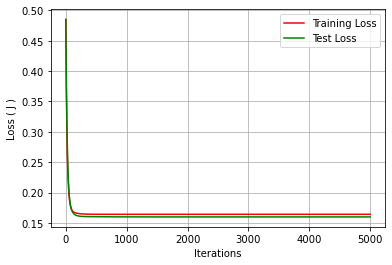

In [385]:
plt.figure(1)                                      # Plotting the loss
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss ( J )')
plt.plot(range(1,iterations+1), loss_hist, color='red')
plt.plot(range(1,iterations+1), loss_hist_test, color='green')
plt.legend(['Training Loss','Test Loss'])
print('Training Loss is' , loss_hist[-1], '  standardscaler()')
print('    Test Loss is' , loss_hist_test[-1])

In [455]:
'''
P 3 A

Repeat problem 2 a, this time by adding parameters penalty to your 
loss function. Note that in this case, you need to modify the 
gradient decent logic for your training set, but you don’t need to 
change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the 
best input scaling approach (standardization or normalization). 
Explain your results and compare them against problem 2 a. 
'''

HS = pd.read_csv('Housing.csv')
HS.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [456]:
from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
np.random.seed(0)
df_train, df_test = train_test_split(HS, train_size = 0.8, test_size = 0.2)
#print(df_train.shape)
num_vars = ['area','bedrooms','bathrooms','stories','parking','price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000
...,...,...,...,...,...,...
70,4000,3,2,2,0,6790000
277,10360,2,1,1,1,4305000
9,5750,3,2,4,1,9800000
359,3600,3,1,1,1,3710000


In [457]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
#scaler = StandardScaler()
scaler = MinMaxScaler()
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain)
df_Newtrain.head(5)
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest)
df_Newtest.head(5)

C:\Users\Evan\AppData\Local\Temp\ipykernel_25480\2111214082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain)
C:\Users\Evan\AppData\Local\Temp\ipykernel_25480\2111214082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Newtest[num_vars] = scaler.fit_transform(df_Newtest)


,area,bedrooms,bathrooms,stories,parking,price
239,0.203463,0.50,0.0,0.333333,0.333333,0.270000
113,0.690043,0.50,0.0,0.000000,0.666667,0.412667
325,0.156710,0.75,0.0,0.333333,0.000000,0.215000
66,1.000000,0.25,0.0,0.000000,0.333333,0.493333
479,0.174026,0.75,0.0,0.333333,0.000000,0.113333


In [458]:
Y = df_Newtrain.values[:,5]                         # get known price outputs
m = len(Y)
X = df_Newtrain.values[:,0:5]
X = X.reshape(m,5)
X_0 = np.ones((m,1))
X = np.hstack((X_0,X))

Y_test = df_Newtest.values[:,5]                     # get Test price outputs
m_test = len(Y_test)
X_test = df_Newtest.values[:,0:5]
X_test = X_test.reshape(m_test,5)
X_0_test = np.ones((m_test,1))
X_test = np.hstack((X_0_test,X_test))

theta = np.zeros(6)                                 # reset Theta

In [459]:
alpha = 0.01                                # Learning Rate and Iterations
iterations = 5000
lam = 0.01

In [460]:
def loss(y,X,m, theta):                             # Loss/Cost Function
    
    H = X.dot(theta)
    error = np.subtract(H,y)
    error_sqrd = np.square(error)
    sum_errors = np.sum(error_sqrd)
    J = np.divide(sum_errors,(2*m))
    
    return J

In [461]:
def grad_decent(theta, alpha, x, y,  iterations):   # Gradient Decent Function
    
    loss_hist = np.zeros(iterations)
    loss_hist_test = np.zeros(iterations)
    
    for i in range(iterations):
        
        H = X.dot(theta)
        err = np.subtract(H,y)
        delta = (x.transpose().dot(err))+(lam*theta)
        gradient = (delta / m) #+(lam*theta)
        theta = theta - (alpha*gradient)
        loss_hist[i] = loss(y,X, m, theta)
        loss_hist_test[i] = loss(Y_test,X_test, m_test, theta)
    
    return theta, loss_hist, loss_hist_test

In [462]:
theta, loss_hist, loss_hist_test = grad_decent(theta, alpha, X, Y, iterations)
print('Theta =', theta)
print('     Loss =', loss_hist)
print('Test_Loss =', loss_hist_test)

Theta = [0.06205798 0.28363593 0.10037226 0.20675832 0.14103787 0.11979021]
     Loss = [0.04697501 0.04596297 0.04497855 ... 0.00630863 0.00630855 0.00630847]
Test_Loss = [0.05200566 0.05088612 0.04979644 ... 0.00518018 0.00518014 0.0051801 ]


Training Loss is 0.006308467614048177
    Test Loss is 0.005180101596650056


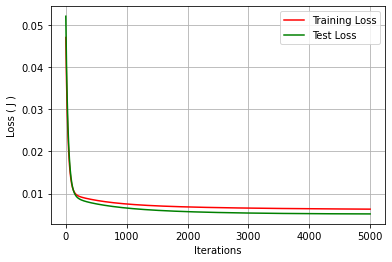

In [463]:
plt.figure(1)                                      # Plotting the loss
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss ( J )')
plt.plot(range(1,iterations+1), loss_hist, color='red')
plt.plot(range(1,iterations+1), loss_hist_test, color='green')
plt.legend(['Training Loss','Test Loss'])
print('Training Loss is' , loss_hist[-1])
print('    Test Loss is' , loss_hist_test[-1])

In [464]:
'''
P 3 B

Repeat problem 2 b, this time by adding parameters penalty to your 
loss function. Note that in this case, you need to modify the 
gradient decent logic for your training set, but you don’t need to 
change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the 
best input scaling approach (standardization or normalization). 
Explain your results and compare them against problem 2 b. 
'''
HS = pd.read_csv('Housing.csv')
HS.head()
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

In [465]:
num_vars = ['area','bedrooms','bathrooms','stories','parking','price'] # define binary attributes
bin_vars = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

HS_bin = HS[bin_vars]                                                  # Quantize yes and no
HS_bin = HS[bin_vars].apply(binary_map)

allvars = (bin_vars + num_vars)
#HS_bin.head()

In [466]:
HS_2b = pd.concat((HS_bin,HS[num_vars]), axis=1)
HS_2b.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area,bedrooms,bathrooms,stories,parking,price
0,1,0,0,0,1,1,7420,4,2,3,2,13300000
1,1,0,0,0,1,0,8960,4,4,4,3,12250000
2,1,0,1,0,0,1,9960,3,2,2,2,12250000
3,1,0,1,0,1,1,7500,4,2,2,3,12215000
4,1,1,1,0,1,0,7420,4,1,2,2,11410000


In [467]:
from sklearn.model_selection import train_test_split  #Split data into 80% training and 20% test sets
#np.random.seed(0)
df_train, df_test = train_test_split(HS_2b, train_size = 0.8, test_size = 0.2,random_state=7)
#print(df_train.shape)

In [468]:
df_Newtrain = df_train[allvars]
df_Newtest = df_test[allvars]
#df_Newtrain.head()

In [469]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler   #Scale Training and test sets
#scaler = StandardScaler()              #lowest test loss 0.1598 ----from prev
scaler = MinMaxScaler()                #lowest test loss 0.00440 ----from prev
df_Newtrain[allvars] = scaler.fit_transform(df_Newtrain)
df_Newtrain.head(5)
df_Newtest[allvars] = scaler.fit_transform(df_Newtest)
df_Newtest.head(5)

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area,bedrooms,bathrooms,stories,parking,price
542,1.0,0.0,0.0,0.0,0.0,0.0,0.174429,0.25,0.0,0.000000,0.0,0.000000
70,1.0,0.0,1.0,0.0,1.0,1.0,0.208075,0.50,0.5,0.333333,0.0,0.481605
504,1.0,0.0,0.0,0.0,1.0,0.0,0.135913,0.25,0.0,0.000000,0.0,0.086288
221,1.0,0.0,0.0,0.0,0.0,0.0,0.156720,0.75,0.5,0.333333,0.0,0.288294
519,1.0,0.0,0.0,0.0,0.0,0.0,0.282451,0.25,0.0,0.333333,0.0,0.066890


In [470]:
Y = df_Newtrain.values[:,11]                         # get known price outputs
m = len(Y)
X = df_Newtrain.values[:,0:11]
X = X.reshape(m,11)
X_0 = np.ones((m,1))
X = np.hstack((X_0,X))

Y_test = df_Newtest.values[:,11]                     # get Test price outputs
m_test = len(Y_test)
X_test = df_Newtest.values[:,0:11]
X_test = X_test.reshape(m_test,11)
X_0_test = np.ones((m_test,1))
X_test = np.hstack((X_0_test,X_test))

theta = np.zeros(12)   

In [471]:
alpha = 0.01                                        # Learning Rate and Iterations
iterations = 5000

In [472]:
theta, loss_hist, loss_hist_test = grad_decent(theta, alpha, X, Y, iterations)
print('Theta =', theta)                             # Perform ML
print('     Loss =', loss_hist)
print('Test Loss =', loss_hist_test)

Theta = [0.01472661 0.04829015 0.03102769 0.03510738 0.06825584 0.08067803
 0.05901819 0.22666879 0.07081431 0.20219301 0.11665802 0.09533915]
     Loss = [0.0463564  0.04452298 0.04277774 ... 0.00452424 0.00452416 0.00452409]
Test Loss = [0.05017213 0.04823003 0.04637988 ... 0.00474275 0.00474282 0.00474289]


Training Loss is 0.004524085793781414
    Test Loss is 0.004742891633862348


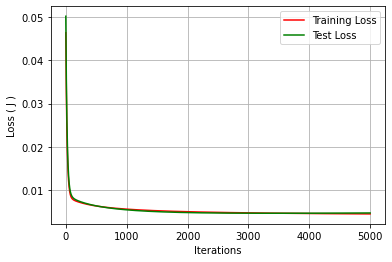

In [473]:
plt.figure(1)                                      # Plotting the loss
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss ( J )')
plt.plot(range(1,iterations+1), loss_hist, color='red')
plt.plot(range(1,iterations+1), loss_hist_test, color='green')
plt.legend(['Training Loss','Test Loss'])
print('Training Loss is' , loss_hist[-1])
print('    Test Loss is' , loss_hist_test[-1])